In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('telco_customer_churn.csv')

In [3]:
print(df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [4]:
print(df.shape)

(7043, 21)


In [5]:
print(df.describe())

       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


In [6]:
print(df.dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [7]:
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


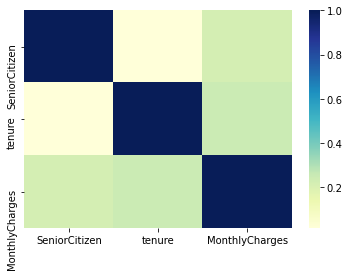

In [8]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, cmap='YlGnBu')
plt.show()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


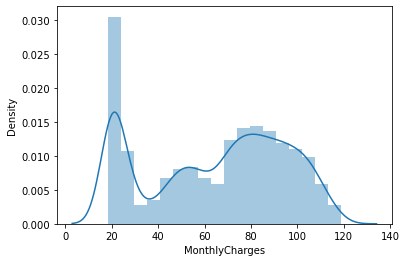

In [9]:
sns.distplot(df['MonthlyCharges'])
plt.show()

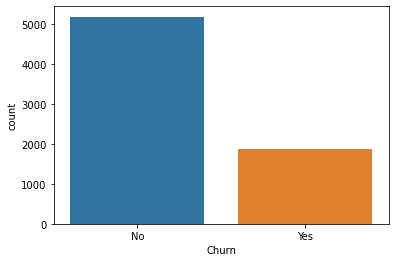

In [10]:
sns.countplot(x='Churn', data=df)
plt.show()

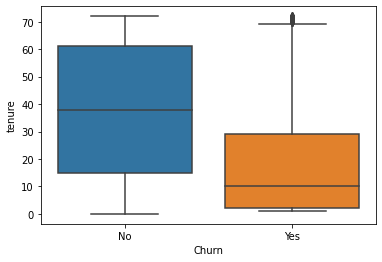

In [11]:
sns.boxplot(x='Churn', y='tenure', data=df)
plt.show()

In [12]:
df['TotalCharges'] = df['tenure'] * df['MonthlyCharges']
df['HasInternetService'] = np.where(df['InternetService']=='No', 'No', 'Yes')

In [13]:
df = df.drop(['customerID', 'tenure', 'MonthlyCharges'], axis=1)

In [14]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)
df = df.dropna()

In [15]:
cat_vars = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
            'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
            'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 
            'PaperlessBilling', 'PaymentMethod', 'HasInternetService', 'Churn']
for var in cat_vars:
    df[var] = pd.get_dummies(df[var], drop_first=True)

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_vars = ['SeniorCitizen', 'TotalCharges']
df[num_vars] = scaler.fit_transform(df[num_vars])

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

In [18]:
X = df.drop('Churn', axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
print('Logistic Regression:')
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred))

Logistic Regression:
Accuracy: 0.7993374349266446
Precision: 0.6794258373205742
Recall: 0.49477351916376305
F1 Score: 0.5725806451612904
ROC AUC Score: 0.703851996748873


In [20]:
dt = DecisionTreeClassifier()
params = {'max_depth'}

In [21]:
dt = DecisionTreeClassifier()
params = {'max_depth': [3, 5, 7, 9, 11]}
grid_dt = GridSearchCV(dt, param_grid=params, cv=5)
grid_dt.fit(X_train, y_train)
best_dt = grid_dt.best_estimator_
y_pred = best_dt.predict(X_test)
print('Decision Tree:')
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred))


Decision Tree:
Accuracy: 0.7941315664931378
Precision: 0.6392785571142284
Recall: 0.5557491289198606
F1 Score: 0.5945945945945945
ROC AUC Score: 0.7193950322961876


In [22]:
rf = RandomForestClassifier(n_estimators=100, max_depth=6, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print('Random Forest:')
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred))

Random Forest:
Accuracy: 0.7903454803596782
Precision: 0.717607973421927
Recall: 0.37630662020905925
F1 Score: 0.49371428571428577
ROC AUC Score: 0.6605379754716512


In [23]:
importances = rf.feature_importances_
features = X_train.columns
indices = np.argsort(importances)[::-1]

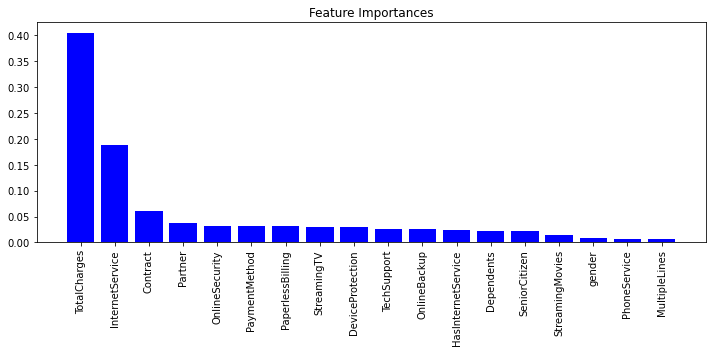

In [24]:
plt.figure(figsize=(10, 5))
plt.title('Feature Importances')
plt.bar(range(len(indices)), importances[indices], color='blue', align='center')
plt.xticks(range(len(indices)), [features[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()

In [25]:
import pickle

In [27]:
from sklearn.ensemble import RandomForestClassifier
import joblib

In [28]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [29]:
rf = RandomForestClassifier()
rf.fit(X, y)

RandomForestClassifier()

In [30]:
joblib.dump(rf, 'telco_churn_rf.joblib')

['telco_churn_rf.joblib']

In [31]:
import joblib

In [32]:
rf = joblib.load('telco_churn_rf.joblib')

In [47]:
df.to_csv('new_data.csv', index=False)


In [48]:
new_data = pd.read_csv('new_data.csv')

In [55]:
dt.fit(X_train, y_train)


DecisionTreeClassifier()

In [56]:
dt.feature_importances_


array([0.03642302, 0.02565708, 0.02414659, 0.02782213, 0.00574417,
       0.0046468 , 0.09065315, 0.00461354, 0.        , 0.01716384,
       0.        , 0.        , 0.        , 0.0200791 , 0.02450688,
       0.02546088, 0.69308284, 0.        ])

In [57]:
dt.feature_importances_.shape[0]

18

In [60]:
n_features = dt.feature_importances_.shape[0]


In [62]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [63]:
from flask import Flask, request, jsonify

In [65]:
app = Flask(__name__)

In [66]:
def preprocess_data(data):
    X = data.drop('Churn', axis=1)
    X = pd.get_dummies(X, columns=['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'])
    X = scaler.transform(X)
    return X

In [67]:
def predict():
    data = request.get_json()
    X = preprocess_data(pd.DataFrame(data))
    y_pred_prob = model.predict_proba(X)[:, 1]
    y_pred = np.where(y_pred_prob > 0.5, 1, 0)
    return jsonify(y_pred.tolist())

In [ ]:
if __name__ == '__main__':
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
